In [1]:
#Import python packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import seaborn as sb
import sys

#Import my function
basedir = '/Users/bono/Desktop/gm2FieldAnalysis/MovingSensors/'
sys.path.append(basedir+'src')
from averaging_rules import trap_avg
from filters import direct_removal, repeat_averager, spike_removal

# Read in the raw freq and phi data from a CSV file

In [2]:
#specify the data
data_dir = basedir+'testdata/'
file_path = data_dir + 'Run3956Probe0.txt'
# file_path = data_dir + '60HrDipole_comma.txt'

#read the data into a pandas dataframe
df = pd.read_csv(file_path,  delimiter = ',',comment='#', names=['Phi','Frequency'])

# Convert the df to a numpy ndarray
data = df.values
phi = data[:,0]
freq = data[:,1]
last_size = phi.size
print("size is ", phi.size)

size is  8781


# Plot phi before sorting

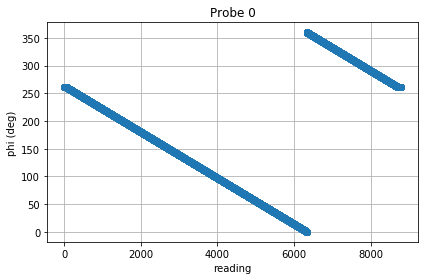

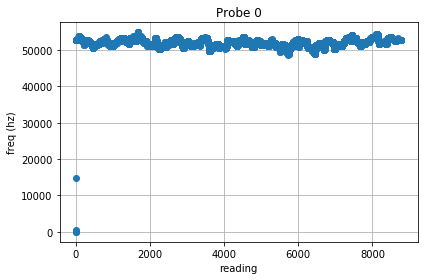

In [3]:
plt.plot(phi, 'o')
plt.title('Probe 0')
plt.xlabel('reading')
plt.ylabel('phi (deg)')
plt.grid()
plt.tight_layout()
plt.show()

plt.plot(freq, 'o')
plt.title('Probe 0')
plt.xlabel('reading')
plt.ylabel('freq (hz)')
plt.grid()
plt.tight_layout()
plt.show()

# Sort and re-plot phi and freq

In [4]:
arr1inds = phi.argsort()
phi = phi[arr1inds[::1]]
freq = freq[arr1inds[::1]]

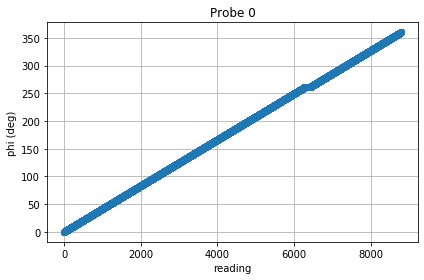

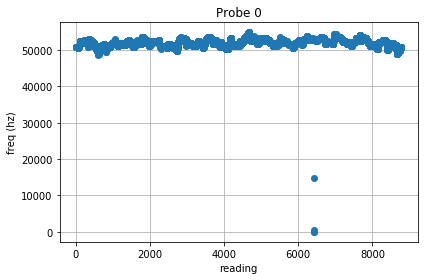

In [5]:
plt.plot(phi, 'o')
plt.title('Probe 0')
plt.xlabel('reading')
plt.ylabel('phi (deg)')
plt.grid()
plt.tight_layout()
plt.show()

plt.plot(freq, 'o')
plt.title('Probe 0')
plt.xlabel('reading')
plt.ylabel('freq (hz)')
plt.grid()
plt.tight_layout()
plt.show()

# Plot the the raw freq vs phi and get the azimuthal average

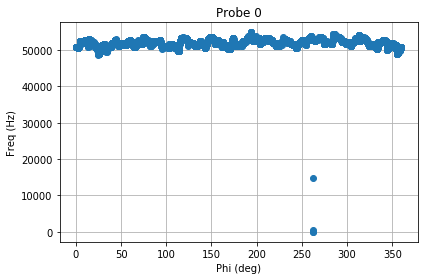

flat =  52031.81427092587
trap =  52038.62914193342


In [6]:
# Plot freq vs phi
plt.plot(phi,freq, 'o')
plt.title('Probe 0')
plt.xlabel('Phi (deg)')
plt.ylabel('Freq (Hz)')
plt.grid()
plt.tight_layout()
plt.show()
flat = np.mean(freq, dtype=np.float64)
print("flat = ",flat)
trap = trap_avg(phi,freq)
print("trap = ", trap)
past_flat = flat
past_trap = trap

# Remove freqs that lie 20 sigma outside of the main cluster and re-average

In [7]:
phi,freq = direct_removal(phi,freq,20.0)

print("new size is ", phi.size,": reduced by",last_size - phi.size,"points")
last_size = phi.size

new size is  8777 : reduced by 4 points


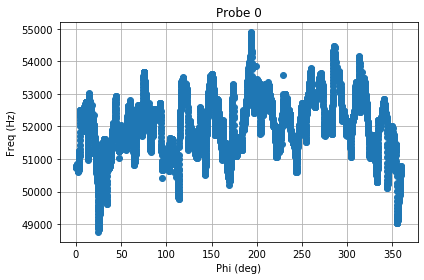

flat =  52053.7867380654  changed by 21.972467139530636
trap =  52041.41249460733  changed by 2.7833526739050285


In [8]:
# Plot freq vs phi again
plt.plot(phi,freq, 'o')
plt.title('Probe 0')
plt.xlabel('Phi (deg)')
plt.ylabel('Freq (Hz)')
plt.grid()
plt.tight_layout()
plt.show()
flat = np.mean(freq, dtype=np.float64)
print("flat = ",flat,' changed by', flat - past_flat)
trap = trap_avg(phi,freq)
print("trap = ", trap,' changed by', trap  - past_trap)
past_flat = flat
past_trap = trap

# Average repeated points (in phi) and treat as one

In [ ]:
phi,freq = repeat_averager(phi,freq)
print("new size is ", phi.size,": reduced by",last_size - phi.size,"points")
last_size = phi.size

new size is  8671 : reduced by 106 points


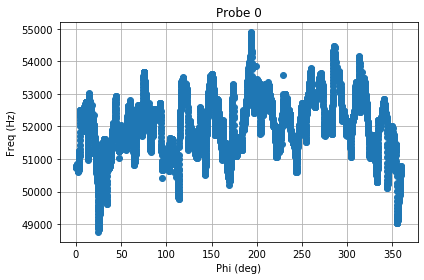

flat =  52044.319054502055  changed by -9.467683563343599
trap =  52041.41250799676  changed by 1.3389435480348766e-05


In [ ]:
# Plot freq vs phi again
plt.plot(phi,freq, 'o')
plt.title('Probe 0')
plt.xlabel('Phi (deg)')
plt.ylabel('Freq (Hz)')
plt.grid()
plt.tight_layout()
plt.show()
flat = np.mean(freq, dtype=np.float64)
print("flat = ",flat,' changed by', flat - past_flat)
trap = trap_avg(phi,freq)
print("trap = ", trap,' changed by', trap  - past_trap)
past_flat = flat
past_trap = trap

# Remove "Spikes" and re-average

In [ ]:
phi,freq = spike_removal(phi,freq)
print("new size is ", phi.size,": reduced by",last_size - phi.size,"points")
last_size = phi.size

new size is  6906 : reduced by 1765 points


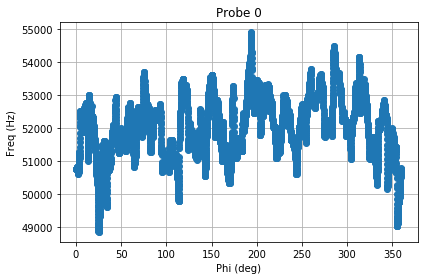

flat =  52035.023316186984  changed by -9.295738315071503
trap =  52041.32092446165  changed by -0.09158353511156747


In [ ]:
# # Plot freq vs phi again
plt.plot(phi,freq, 'o')
plt.title('Probe 0')
plt.xlabel('Phi (deg)')
plt.ylabel('Freq (Hz)')
plt.grid()
plt.tight_layout()
plt.show()
flat = np.mean(freq, dtype=np.float64)
print("flat = ",flat,' changed by', flat - past_flat)
trap = trap_avg(phi,freq)
print("trap = ", trap,' changed by', trap  - past_trap)
past_flat = flat
past_trap = trap

# Get trap avgs for 50 universes with 0.05 deg gaus smearing (~0.6 mm)

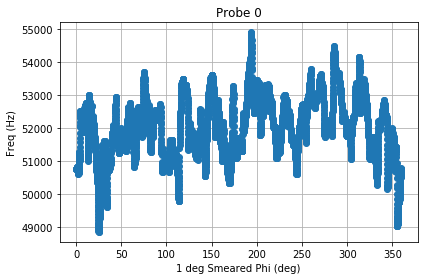

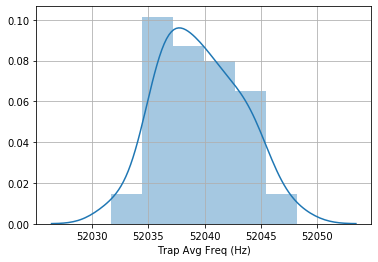

mean freq =  52039.52885603611 +/- 3.5882313520312104


In [ ]:
traps = np.empty(0)
for i in range(50):
    phi_smear1 = np.empty(0)
    for i in range(last_size):
        number = random.gauss(0, 0.05)
        phi_smear1 = np.append(phi_smear1, phi[i] + number)
    trap = trap_avg(phi_smear1,freq)
    traps = np.append(traps,trap)

#Draw a representitive freq vs phi plot
plt.plot(phi_smear1,freq, 'o')
plt.title('Probe 0')
plt.xlabel('1 deg Smeared Phi (deg)')
plt.ylabel('Freq (Hz)')
plt.grid()
plt.tight_layout()
plt.show()    
#Plot the avgs
sb.distplot(traps)
plt.xlabel('Trap Avg Freq (Hz)')
plt.grid()
plt.show()
print("mean freq = ",np.mean(traps), "+/-", np.sqrt(np.var(traps)))

# Get trap avgs for 50 universes with 0.1 deg gaus smearing (~1.2 mm)

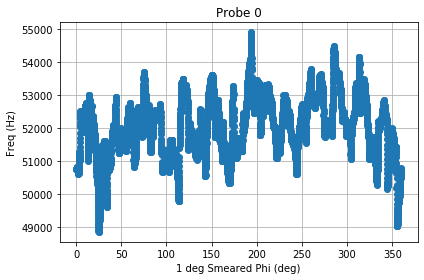

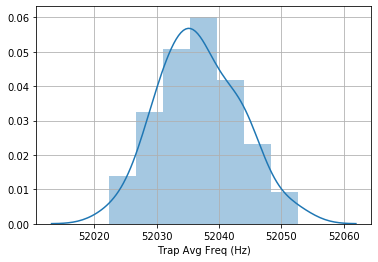

mean freq =  52036.85351522108 +/- 6.318358514660085


In [ ]:
traps = np.empty(0)
for i in range(50):
    phi_smear1 = np.empty(0)
    for i in range(last_size):
        number = random.gauss(0, 0.1)
        phi_smear1 = np.append(phi_smear1, phi[i] + number)
    trap = trap_avg(phi_smear1,freq)
    traps = np.append(traps,trap)
        
#Draw a representitive freq vs phi plot
plt.plot(phi_smear1,freq, 'o')
plt.title('Probe 0')
plt.xlabel('1 deg Smeared Phi (deg)')
plt.ylabel('Freq (Hz)')
plt.grid()
plt.tight_layout()
plt.show()    
#Plot the avgs
sb.distplot(traps)
plt.xlabel('Trap Avg Freq (Hz)')
plt.grid()
plt.show()
print("mean freq = ",np.mean(traps), "+/-", np.sqrt(np.var(traps)))    


# Get trap avgs for 50 universes with 0.5 deg gaus smearing (~6 mm) 

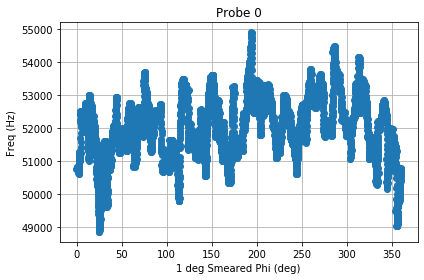

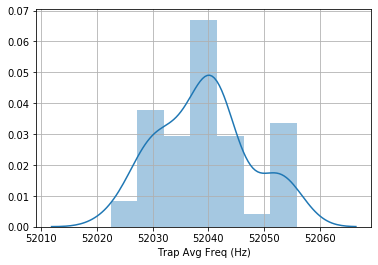

mean freq =  52039.1777750398 +/- 8.157204476320988


In [ ]:
traps = np.empty(0)
for i in range(50):
    phi_smear1 = np.empty(0)
    for i in range(last_size):
        number = random.gauss(0, 0.5)
        phi_smear1 = np.append(phi_smear1, phi[i] + number)
    trap = trap_avg(phi_smear1,freq)
    traps = np.append(traps,trap)

#Draw a representitive freq vs phi plot
plt.plot(phi_smear1,freq, 'o')
plt.title('Probe 0')
plt.xlabel('1 deg Smeared Phi (deg)')
plt.ylabel('Freq (Hz)')
plt.grid()
plt.tight_layout()
plt.show()    
#Plot the avgs
sb.distplot(traps)
plt.xlabel('Trap Avg Freq (Hz)')
plt.grid()
plt.show()
print("mean freq = ",np.mean(traps), "+/-", np.sqrt(np.var(traps)))  

# Get trap avgs for 50 universes with 30 deg gaus smearing

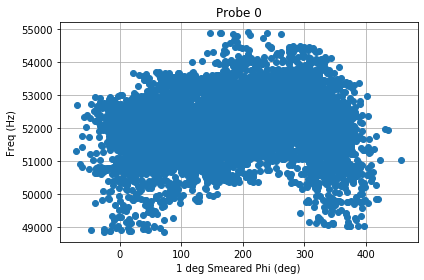

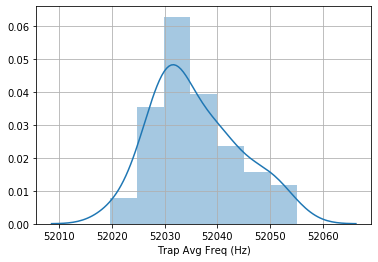

mean freq =  52035.87276879373 +/- 8.21955450897759


In [ ]:
traps = np.empty(0)
for i in range(50):
    phi_smear1 = np.empty(0)
    for i in range(last_size):
        number = random.gauss(0, 30)
        phi_smear1 = np.append(phi_smear1, phi[i] + number)
    trap = trap_avg(phi_smear1,freq)
    traps = np.append(traps,trap)

#Draw a representitive freq vs phi plot
plt.plot(phi_smear1,freq, 'o')
plt.title('Probe 0')
plt.xlabel('1 deg Smeared Phi (deg)')
plt.ylabel('Freq (Hz)')
plt.grid()
plt.tight_layout()
plt.show()    
#Plot the avgs
sb.distplot(traps)
plt.xlabel('Trap Avg Freq (Hz)')
plt.grid()
plt.show()
print("mean freq = ",np.mean(traps), "+/-", np.sqrt(np.var(traps)))  

# The upper bound uncertainty is +/- 2mm. 124 mm = 1 deg, so 2mm = 1/62 deg = 0.016 deg. So scan by 0.001 deg in smearing factors up to 0.016

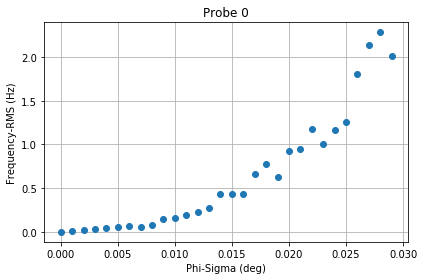

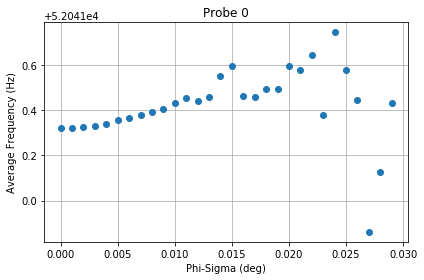

In [ ]:
rms_vec = np.empty(0)
sigma_vec = np.empty(0)
avg_vec = np.empty(0)

for s in range(30):
    sigma = s*0.001
    traps = np.empty(0)
    for i in range(30):
        phi_smear1 = np.empty(0)
        for i in range(last_size):
            number = random.gauss(0, sigma)
            phi_smear1 = np.append(phi_smear1, phi[i] + number)
        trap = trap_avg(phi_smear1,freq)
        traps = np.append(traps,trap)
    sigma_vec = np.append(sigma_vec, sigma)
    rms_vec = np.append(rms_vec, np.sqrt(np.var(traps)))
    avg_vec = np.append(avg_vec, np.average(traps))
plt.plot(sigma_vec,rms_vec, 'o')
plt.title('Probe 0')
plt.xlabel('Phi-Sigma (deg)')
plt.ylabel('Frequency-RMS (Hz)')
plt.grid()
plt.tight_layout()
plt.show()

plt.plot(sigma_vec,avg_vec, 'o')
plt.title('Probe 0')
plt.xlabel('Phi-Sigma (deg)')
plt.ylabel('Average Frequency (Hz)')
plt.grid()
plt.tight_layout()
plt.show()

# Now do the smearing before the data treatment

In [ ]:

# reset the rms, sigma, and avg vectors
rms_vec = np.empty(0)
sigma_vec = np.empty(0)
avg_vec = np.empty(0)
#reload the raw data
phi2 = data[:,0]
freq2 = data[:,1]

for s in range(30):
    sigma = s*0.001
    traps = np.empty(0)
    for i in range(30):
        phi_smear2 = np.empty(0) #gets reset every universe
        freq_smear2 = freq2 #gets reset every universe
        #do the smearing
        for i in range(phi2.size):
            number = random.gauss(0, sigma)
            phi_smear2 = np.append(phi_smear2, phi2[i] + number)
        #once the smearing is done, do the usual data treatment
        #Sort according to phi
        arr1inds =  phi_smear2.argsort()
        phi_smear2 = phi_smear2[arr1inds[::1]]
        freq_smear2 = freq_smear2[arr1inds[::1]]
        #Direct outlier removal
        phi_smear2,freq_smear2 = direct_removal(phi_smear2,freq_smear2,20.0)
        #Average repeated points
        phi_smear2,freq_smear2 = repeat_averager(phi_smear2,freq_smear2)
        #Remove spikes
        phi_smear2,freq_smear2 = spike_removal(phi_smear2,freq_smear2)

        
        trap = trap_avg(phi_smear2,freq_smear2)
        traps = np.append(traps,trap)
    sigma_vec = np.append(sigma_vec, sigma)
    rms_vec = np.append(rms_vec, np.sqrt(np.var(traps)))
    avg_vec = np.append(avg_vec, np.average(traps))
plt.plot(sigma_vec,rms_vec, 'o')
plt.title('Probe 0')
plt.xlabel('Phi-Sigma (deg)')
plt.ylabel('Frequency-RMS (Hz)')
plt.grid()
plt.tight_layout()
plt.show()


plt.plot(sigma_vec,avg_vec, 'o')
plt.title('Probe 0')
plt.xlabel('Phi-Sigma (deg)')
plt.ylabel('Average Frequency (Hz)')
plt.grid()
plt.tight_layout()
plt.show()


In [ ]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)

plt.plot(sigma_vec,rms_vec, 'o')
plt.title('Probe 0')
plt.xlabel('Phi-Sigma (deg)')
plt.ylabel('Frequency-RMS (Hz)')
plt.grid()
plt.tight_layout()
plt.savefig('rms.png', dpi=1200)
plt.show()


plt.plot(sigma_vec,avg_vec, 'o')
plt.title('Probe 0')
plt.xlabel('Phi-Sigma (deg)')
plt.ylabel('Average Frequency (Hz)')
plt.grid()
plt.tight_layout()
plt.savefig('avg.png', dpi=1200)
plt.show()